<h1><center>SwiggyTo</center></h1>

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt  
import numpy as np     
%matplotlib inline 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

<h4>(A) DATA QUALITY AND TRANSFORMATION</h4>

In [2]:
google_docs_file_url='https://drive.google.com/file/d/1FhsZD6dnPYUFLaSf21cIa6aalBzsa7iB/view?usp=sharing'
file_id=google_docs_file_url.split('/')[-2]
file_path='https://drive.google.com/uc?id=' + file_id
data = pd.read_csv(file_path)
data.columns

Index(['ID', 'Provider', 'DateTime', 'Distance', 'Status', 'Cost', 'PromoCode',
       'Delivery Time', 'Discount', 'Paid amount', 'Payment mode',
       'Delivery charges', 'Surge charges', 'Packaging charges', 'ST', 'Tip',
       'PureVeg', 'Items', 'Membership', 'Type', 'Rating'],
      dtype='object')

<b>Rating</b> is our Targest variable. Except that all are features.

Let's see what is the data available for us to process in each and every column.

In [3]:
def find_unique_values():
  columns = data.columns
  for column in columns:
    print(column)
    print(data[column].unique())

find_unique_values() 

ID
[  1.   2.   3.   4. 423.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  nan  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.
  27.  28.  29.  30.  31. 310.  32.  33.  34.  35.  36.  37.  56.  38.
  39.  40. 467.  41.  42.  43.  44.  45.  46.  47. 456.  48.  49.  50.
  51.]
Provider
[nan]
DateTime
['1-July-2020 8.38 PM' '1-July-2020 8.38 AM' '1-July-2020 9.00 PM'
 '1-July-2020 7.30 PM' '1-July-2020 7.38 PM' '1-July-2020 9.38 AM'
 '1-July-2020 8.00 PM' '2-July-2020 8.38 PM' '2-July-2020 8.38 AM'
 '2-July-2020 9.00 PM' '2-July-2020 7.30 PM' '2-July-2020 7.38 PM'
 '2-July-2020 9.38 AM' '2-July-2020 8.00 PM' '3-July-2020 8.38 PM'
 '3-July-2020 8.38 AM' '3-July-2020 9.00 PM' '3-July-2020 7.30 PM'
 '3-July-2020 7.38 PM' '3-July-2020 9.38 AM' '3-July-2020 8.00 PM'
 '4-July-2020 8.38 PM' '4-July-2020 8.38 AM' '4-July-2020 9.00 PM'
 '4-July-2020 7.30 PM' '4-July-2020 7.38 PM' '4-July-2020 9.38 AM'
 '4-July-2020 8.00 PM' '5-July-2020 8.38 PM' '5-July-2020 8.38 AM'
 '5-July-202

ID is an irrelevent attribute. So we can remove that.<br/>
Provider is an empty column we can remove that as well.

In [4]:
data.drop('ID', axis = 1, inplace = True)
data.drop('Provider',axis = 1, inplace= True)

Distance can't be negative. Only magnitude matters. So let's take absolute values

In [5]:
data.loc[data["Distance"] < 0,"Distance"] = abs(data["Distance"])

Found mixed data types in **Cost** feature. But value 'COD' seems like a Payment mode. Let's invistigate this by fetching that row.

In [6]:
data[data["Cost"] == 'COD']

,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Paid amount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
23,3-July-2020 8.38 PM,NaN,NaN,COD,20,NaN,10.0,5.0,NaN,Y,DAL;ROTI,NO,VEG,2.0,NaN,NaN,NaN,NaN,NaN


By looking at the above row we can say that values are mis matched to wrong columns or features. Values were left shifted to 5 columns from Payment mode.

In [7]:
ind = data.index[data["Cost"] == 'COD'].tolist()[0]
row = data.loc[ind].to_frame().T
result = row.shift(periods=5, axis="columns")
data.loc[ind] = result.iloc[0]
data.loc[ind]

DateTime                             NaN
Distance                             NaN
Status                               NaN
Cost                                 NaN
PromoCode                            NaN
Delivery Time        3-July-2020 8.38 PM
Discount                             NaN
Paid amount                          NaN
Payment mode                         COD
Delivery charges                      20
Surge charges                        NaN
Packaging charges                   10.0
ST                                   5.0
Tip                                  NaN
PureVeg                                Y
Items                           DAL;ROTI
Membership                            NO
Type                                 VEG
Rating                               2.0
Name: 23, dtype: object

In [8]:
find_unique_values()

DateTime
['1-July-2020 8.38 PM' '1-July-2020 8.38 AM' '1-July-2020 9.00 PM'
 '1-July-2020 7.30 PM' '1-July-2020 7.38 PM' '1-July-2020 9.38 AM'
 '1-July-2020 8.00 PM' '2-July-2020 8.38 PM' '2-July-2020 8.38 AM'
 '2-July-2020 9.00 PM' '2-July-2020 7.30 PM' '2-July-2020 7.38 PM'
 '2-July-2020 9.38 AM' '2-July-2020 8.00 PM' nan '3-July-2020 8.38 PM'
 '3-July-2020 8.38 AM' '3-July-2020 9.00 PM' '3-July-2020 7.30 PM'
 '3-July-2020 7.38 PM' '3-July-2020 9.38 AM' '3-July-2020 8.00 PM'
 '4-July-2020 8.38 PM' '4-July-2020 8.38 AM' '4-July-2020 9.00 PM'
 '4-July-2020 7.30 PM' '4-July-2020 7.38 PM' '4-July-2020 9.38 AM'
 '4-July-2020 8.00 PM' '5-July-2020 8.38 PM' '5-July-2020 8.38 AM'
 '5-July-2020 9.00 PM' '5-July-2020 7.30 PM' '5-July-2020 7.38 PM'
 '5-July-2020 9.38 AM' '5-July-2020 8.00 PM']
Distance
[ 3.  6.  4. nan  2.]
Status
['Delivered' 'Cancelled' nan]
Cost
['300' '100' '250' '550' '125' '280' '120' '230' '450' '150' '500' '400'
 '200' nan '350' '600' '225' '380' '220' '330']
PromoCode


Discount Rates are alwasy positive so let's consider absolute values.

In [9]:
data.loc[data["Discount"] < 0,"Discount"] = abs(data["Discount"])

Paid Amount is any empty column. Let's remove that

In [10]:
data.drop('Paid amount', axis = 1, inplace = True)

Let's correct numeric column data types

In [11]:
data["Cost"]  = pd.to_numeric(data["Cost"])
data["Delivery charges"]  = pd.to_numeric(data["Delivery charges"])
data["Surge charges"]  = pd.to_numeric(data["Surge charges"])
data["Packaging charges"]  = pd.to_numeric(data["Packaging charges"])
data["ST"]  = pd.to_numeric(data["ST"])

Let's check for missing values in the data set. We have to process them before we build a model.

In [12]:
data.isnull().sum()

DateTime              1
Distance              1
Status                1
Cost                  1
PromoCode            25
Delivery Time         0
Discount             37
Payment mode          0
Delivery charges      0
Surge charges        33
Packaging charges     0
ST                    0
Tip                  37
PureVeg               0
Items                 0
Membership            0
Type                  0
Rating                2
dtype: int64

Found missing values in DateTime, Distance, Status, Cost, PromoCode, Discount, Surge charges, Tip and Rating.<br/>
To Handle null values in the dataset we can delete row but we can't afford to lose data as dataset size is very less. <br/>
For continuous values we can replace null values by imputing mean or median. <br/>
So we can replace null values mean or median of the remaining values. <br/>

Let's replace **Distance** null value with mean or meadian
1. Get Mean and Median of Distance values.
2. Replace null values with mean and calculate mean again
3. Replace null values with median and calculate mean again
4. Pick which ever mean value is closer to original value.



In [13]:
print("Distance Mean:", data["Distance"].mean())
print("Distance Median:", data["Distance"].median())

Distance Mean: 3.6610169491525424
Distance Median: 3.0


In [14]:
mean = data["Distance"].mean()
median = data["Distance"].median()
data["Distance"].fillna(mean,inplace = True)
data["Distance"].mean()

3.6610169491525424

After replace Distance mean is same as before. So we can go with this replace.

Found one missing value in **Status**. Status is categorical attribute. So let's replace null value with mode of this feature.



In [15]:
data["Status"].fillna(data["Status"].mode()[0], inplace = True)

Cost has one missing value. Let's resolve that.

In [16]:
print("Cost Mean:", data["Cost"].mean())
print("Cost Median:", data["Cost"].median())

Cost Mean: 292.1186440677966
Cost Median: 280.0


In [17]:
data["Cost"].fillna(data["Cost"].mean(),inplace=True)

In [18]:
data["Cost"].mean()

292.1186440677966

**Promo Code** has 23 missing values. Let's create a new category for them as NPCA (No Promo Code Available) and replace all null values with that.

In [19]:
data["PromoCode"].fillna("NPCA",inplace=True)

Found so many null values in Discount, Surge charges and Tip. <br/>
We got these null values because for those transactions there are no discounts available means 0 discount and there are no Surge charges and Tips. So replacing all null values with 0's for those columns

In [20]:
data["Discount"].fillna(0,inplace=True)
data["Surge charges"].fillna(0,inplace=True)
data["Tip"].fillna(0,inplace=True)

Found 2 missing values in Rating. User may forgot to give rating or intentionlay didn't rate at that time. So let's replace them with mode of this feature

In [21]:
rating_mode = (int)(data["Rating"].mode())
rating_mode

3

In [22]:
data["Rating"].fillna(rating_mode,inplace=True)

In [23]:
data.isnull().sum()

DateTime             1
Distance             0
Status               0
Cost                 0
PromoCode            0
Delivery Time        0
Discount             0
Payment mode         0
Delivery charges     0
Surge charges        0
Packaging charges    0
ST                   0
Tip                  0
PureVeg              0
Items                0
Membership           0
Type                 0
Rating               0
dtype: int64

Found one missing value in **DateTime** column.

In [24]:
data["DateTime"] = data["DateTime"].str.replace('.',':')

<ipython-input-24-5906b46d8512>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data["DateTime"] = data["DateTime"].str.replace('.',':')


In [25]:
data["DateTime"] =  pd.to_datetime(data['DateTime'],errors="coerce")

In [26]:
mean = data["DateTime"].mean()

Before we replace DateTime null value with mean we should also check if it is less than Delivery Time or not. Because Food Ordered Time should be less than Food Delivered Time

In [27]:
data["Delivery Time"] = data["Delivery Time"].str.replace('.',':')
data["Delivery Time"] =  pd.to_datetime(data['Delivery Time'])

<ipython-input-27-25b8f3be6509>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data["Delivery Time"] = data["Delivery Time"].str.replace('.',':')


In [28]:
inds = (data[data["DateTime"].isnull()]).index.values
delivery_time = data["Delivery Time"][inds[0]]

In [29]:
print("Calculated Delivery Time")
delivery_time - mean

Calculated Delivery Time


Timedelta('0 days 02:07:47.796610048')

In [30]:
wrong_data_indexes = (data[data["Delivery Time"] < data["DateTime"]]).index.values

This is wrong data Food ordered time should be less than delivered time but we can't afford to lose data.

In [31]:
for ind in wrong_data_indexes:
    datetime = data["DateTime"][ind]
    deliverytime = data["Delivery Time"][ind]
    data.at[ind,'DateTime'] = deliverytime
    data.at[ind,'Delivery Time'] = datetime

In [32]:
datetime_mean = data["DateTime"].mean()

In [33]:
delivery_time

Timestamp('2020-07-03 20:38:00')

In [34]:
delivery_time - datetime_mean

Timedelta('0 days 02:09:49.830508288')

2 hours seems pretty unnatural to deliver food. Let's drop this row

In [35]:
data.drop([data.index[inds[0]]],inplace=True)

In [36]:
data.shape

(59, 18)

In [37]:
data.isnull().sum()

DateTime             0
Distance             0
Status               0
Cost                 0
PromoCode            0
Delivery Time        0
Discount             0
Payment mode         0
Delivery charges     0
Surge charges        0
Packaging charges    0
ST                   0
Tip                  0
PureVeg              0
Items                0
Membership           0
Type                 0
Rating               0
dtype: int64

Let's remove duplicates

In [38]:
data[data.duplicated(keep='first')]

,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating
15,2020-07-01 20:38:00,3.0,Cancelled,125.0,PRO,2020-07-01 20:38:00,0.0,COD,20,0.0,10.0,5.0,0.0,Y,DAL;ROTI,NO,VEG,1.0
19,2020-07-02 09:38:00,3.0,Delivered,300.0,NPCA,2020-07-02 09:58:00,50.0,WALLET,20,0.0,10.0,5.0,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,3.0
42,2020-07-04 09:38:00,3.0,Delivered,300.0,NPCA,2020-07-04 09:58:00,25.0,WALLET,20,0.0,10.0,5.0,5.0,N,DAL;CHICKEN;ROTI,BONG,MIX,4.0
47,2020-07-05 20:38:00,3.0,Delivered,400.0,PRO,2020-07-05 21:38:00,0.0,COD,20,20.0,10.0,5.0,0.0,Y,PANEER;ROTI,BING,VEG,3.0
54,2020-07-02 20:38:00,3.0,Delivered,500.0,NPCA,2020-07-02 21:38:00,50.0,WALLET,20,0.0,10.0,5.0,0.0,Y,PANEER;ROTI,BING,VEG,4.0


In [39]:
data.drop_duplicates(keep='first',inplace=True)

In [40]:
data.shape

(54, 18)

In [41]:
data.dtypes

DateTime             datetime64[ns]
Distance                    float64
Status                       object
Cost                        float64
PromoCode                    object
Delivery Time        datetime64[ns]
Discount                    float64
Payment mode                 object
Delivery charges              int64
Surge charges               float64
Packaging charges           float64
ST                          float64
Tip                         float64
PureVeg                      object
Items                        object
Membership                   object
Type                         object
Rating                      float64
dtype: object

In [42]:
data.reset_index(drop=True, inplace=True)

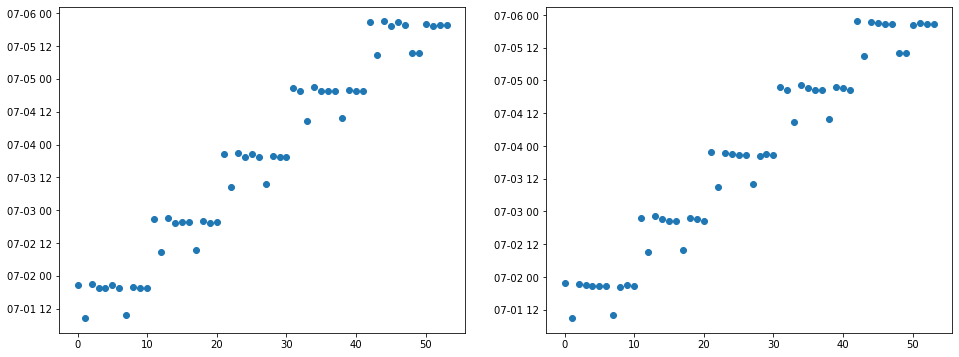

In [43]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.scatter(data.index,data["DateTime"])

plt.subplot(122)
plt.scatter(data.index,data["Delivery Time"])


C:\Users\darkseid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\darkseid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cost'>

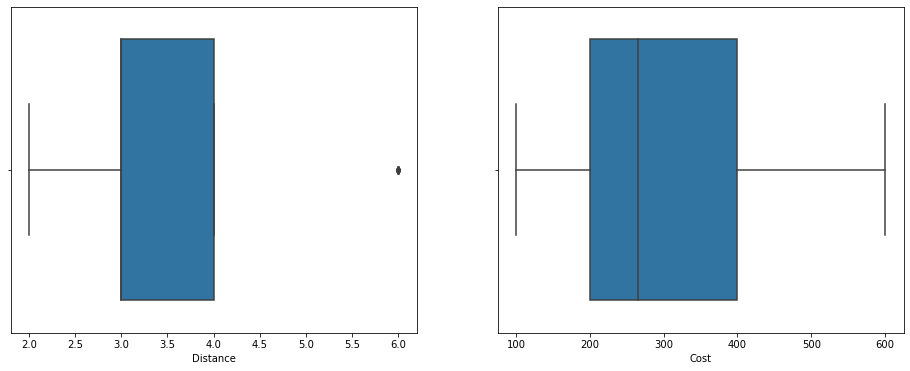

In [44]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.boxplot(data["Distance"])

plt.subplot(122)
sns.boxplot(data['Cost'])


C:\Users\darkseid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\darkseid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Surge charges'>

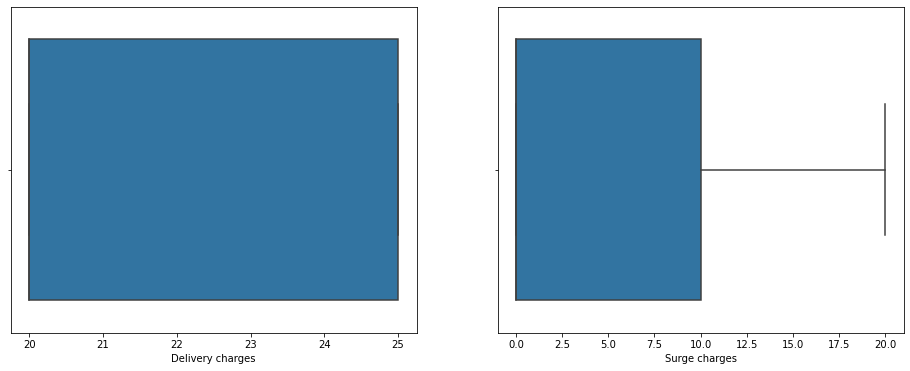

In [45]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.boxplot(data["Delivery charges"])

plt.subplot(122)
sns.boxplot(data['Surge charges'])                    

C:\Users\darkseid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\darkseid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Packaging charges'>

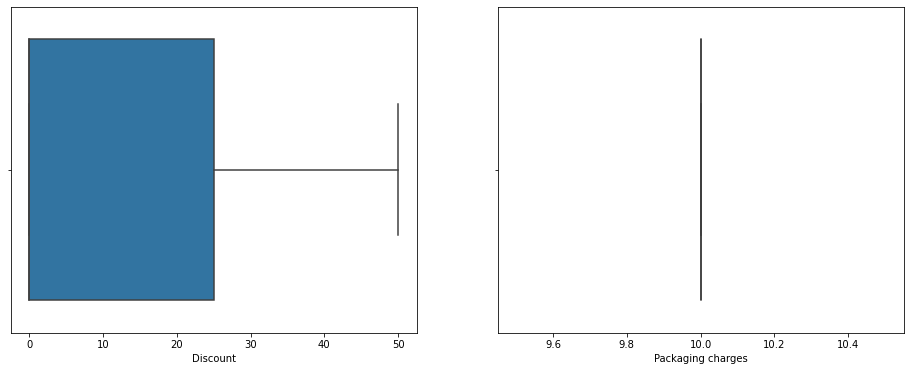

In [46]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.boxplot(data["Discount"])

plt.subplot(122)
sns.boxplot(data['Packaging charges'])

C:\Users\darkseid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\darkseid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tip'>

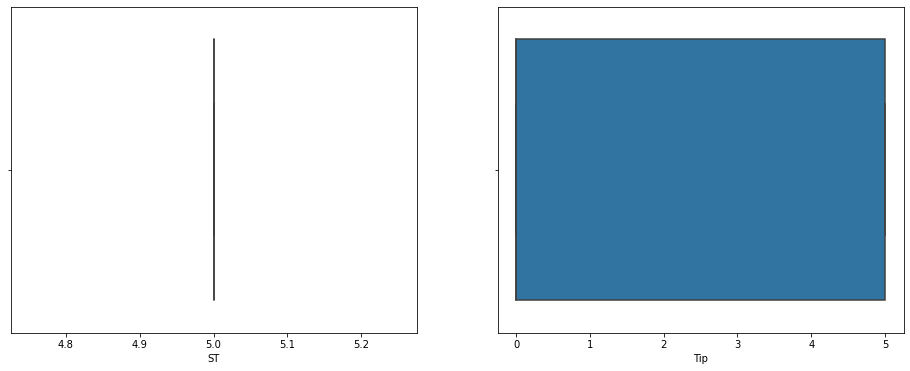

In [47]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.boxplot(data["ST"])

plt.subplot(122)
sns.boxplot(data['Tip'])

Found one possible outlier in Distance column

In [48]:
data.columns

Index(['DateTime', 'Distance', 'Status', 'Cost', 'PromoCode', 'Delivery Time',
       'Discount', 'Payment mode', 'Delivery charges', 'Surge charges',
       'Packaging charges', 'ST', 'Tip', 'PureVeg', 'Items', 'Membership',
       'Type', 'Rating'],
      dtype='object')

In [49]:
delivery_time = data["Delivery Time"] - data["DateTime"]

In [50]:
delivery_time_in_mins = (delivery_time.dt.components["hours"] * 60 ) + delivery_time.dt.components["minutes"]

Found 3 rows where delivery time is 0 that means both food order time and food delivered time both are same. That is incorrect. But all of them were cancelled in that way delivery time will be 0 for them.

In [51]:
data["Delivery Time Mins"] = delivery_time_in_mins

In [52]:
data[data["Delivery Time Mins"] == 0]

,DateTime,Distance,Status,Cost,PromoCode,Delivery Time,Discount,Payment mode,Delivery charges,Surge charges,Packaging charges,ST,Tip,PureVeg,Items,Membership,Type,Rating,Delivery Time Mins
5,2020-07-01 20:38:00,3.0,Cancelled,125.0,PRO,2020-07-01 20:38:00,0.0,COD,20,0.0,10.0,5.0,0.0,Y,DAL;ROTI,NO,VEG,1.0,0
25,2020-07-03 20:38:00,3.0,Cancelled,125.0,PRO,2020-07-03 20:38:00,0.0,COD,20,0.0,10.0,5.0,0.0,Y,DAL;ROTI,NO,VEG,2.0,0
46,2020-07-05 20:38:00,3.0,Cancelled,225.0,PRO,2020-07-05 20:38:00,0.0,COD,20,20.0,10.0,5.0,0.0,Y,DAL;ROTI,BING,VEG,3.0,0


In [53]:
cancelled_Data = (data[(data["Status"] == "Cancelled") & (data["Delivery Time Mins"] > 0)]).index.values

In [54]:
for ind in cancelled_Data:
    data["Delivery Time Mins"][ind] = 0

<ipython-input-54-bc857040581f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Delivery Time Mins"][ind] = 0


Binarization

In [55]:
data['Status'].unique()

array(['Delivered', 'Cancelled'], dtype=object)

In [56]:
data["Status"].replace('Delivered','1',inplace=True)
data["Status"].replace('Cancelled','0',inplace=True)
data["Status"] = pd.to_numeric(data["Status"])

Converting Status of the Order to Binary,

*   Delivered - 1
*   Cancelled - 0

In [57]:
data["Status"].unique()

array([1, 0], dtype=int64)

In [58]:
data.columns

Index(['DateTime', 'Distance', 'Status', 'Cost', 'PromoCode', 'Delivery Time',
       'Discount', 'Payment mode', 'Delivery charges', 'Surge charges',
       'Packaging charges', 'ST', 'Tip', 'PureVeg', 'Items', 'Membership',
       'Type', 'Rating', 'Delivery Time Mins'],
      dtype='object')

In [59]:
promo_dummies = pd.get_dummies(data['PromoCode'])
Payment_dummies = pd.get_dummies(data['Payment mode'])
Membership_dummies = pd.get_dummies(data['Membership'])

In [60]:
dummy_data = pd.concat([promo_dummies, Payment_dummies, Membership_dummies],axis = 1)

In [61]:
dummy_data.columns

Index(['BF', 'NPCA', 'PRO', 'CARD', 'COD', 'WALLET', 'BING', 'BONG', 'NO'], dtype='object')

In [62]:
dummy_data.rename(columns={'BF':'PromoCode_BF','NPCA':'PromoCode_NPCA','PRO':'PromoCode_PRO','CARD':'PaymentMode_CARD','COD':'PaymentMode_COD','WALLET':'PaymentMode_WALLET','BING':'Membership_BING','BONG':'Membership_BONG','NO':'Membership_NO'},inplace=True)

In [63]:
dummy_data.columns

Index(['PromoCode_BF', 'PromoCode_NPCA', 'PromoCode_PRO', 'PaymentMode_CARD',
       'PaymentMode_COD', 'PaymentMode_WALLET', 'Membership_BING',
       'Membership_BONG', 'Membership_NO'],
      dtype='object')

In [64]:
data = pd.concat([data, dummy_data],axis = 1)

In [65]:
data.columns

Index(['DateTime', 'Distance', 'Status', 'Cost', 'PromoCode', 'Delivery Time',
       'Discount', 'Payment mode', 'Delivery charges', 'Surge charges',
       'Packaging charges', 'ST', 'Tip', 'PureVeg', 'Items', 'Membership',
       'Type', 'Rating', 'Delivery Time Mins', 'PromoCode_BF',
       'PromoCode_NPCA', 'PromoCode_PRO', 'PaymentMode_CARD',
       'PaymentMode_COD', 'PaymentMode_WALLET', 'Membership_BING',
       'Membership_BONG', 'Membership_NO'],
      dtype='object')

In [66]:
data["Type"].unique()

array(['VEG', 'MIX'], dtype=object)

In [67]:
data[data["Type"] == "MIX"]["Items"]

1     DAL;CHICKEN;ROTI
3      CHICKEN;BIRYANI
7     DAL;CHICKEN;ROTI
9      CHICKEN;BIRYANI
12    DAL;CHICKEN;ROTI
14     CHICKEN;BIRYANI
17    DAL;CHICKEN;ROTI
19     CHICKEN;BIRYANI
22    DAL;CHICKEN;ROTI
24     CHICKEN;BIRYANI
27    DAL;CHICKEN;ROTI
29     CHICKEN;BIRYANI
33    DAL;CHICKEN;ROTI
35     CHICKEN;BIRYANI
38    DAL;CHICKEN;ROTI
40     CHICKEN;BIRYANI
43    DAL;CHICKEN;ROTI
45     CHICKEN;BIRYANI
48    DAL;CHICKEN;ROTI
49    DAL;CHICKEN;ROTI
51     CHICKEN;BIRYANI
Name: Items, dtype: object

In [68]:
for ind in (data[data['Items']=="CHICKEN;BIRYANI"].index.values.tolist()):
  data["Type"][ind] = "NONVEG"

<ipython-input-68-1d1539d4a8d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Type"][ind] = "NONVEG"


In [69]:
data["Type"].unique()

array(['VEG', 'MIX', 'NONVEG'], dtype=object)

In [70]:
data.columns

Index(['DateTime', 'Distance', 'Status', 'Cost', 'PromoCode', 'Delivery Time',
       'Discount', 'Payment mode', 'Delivery charges', 'Surge charges',
       'Packaging charges', 'ST', 'Tip', 'PureVeg', 'Items', 'Membership',
       'Type', 'Rating', 'Delivery Time Mins', 'PromoCode_BF',
       'PromoCode_NPCA', 'PromoCode_PRO', 'PaymentMode_CARD',
       'PaymentMode_COD', 'PaymentMode_WALLET', 'Membership_BING',
       'Membership_BONG', 'Membership_NO'],
      dtype='object')

In [71]:
data.columns

Index(['DateTime', 'Distance', 'Status', 'Cost', 'PromoCode', 'Delivery Time',
       'Discount', 'Payment mode', 'Delivery charges', 'Surge charges',
       'Packaging charges', 'ST', 'Tip', 'PureVeg', 'Items', 'Membership',
       'Type', 'Rating', 'Delivery Time Mins', 'PromoCode_BF',
       'PromoCode_NPCA', 'PromoCode_PRO', 'PaymentMode_CARD',
       'PaymentMode_COD', 'PaymentMode_WALLET', 'Membership_BING',
       'Membership_BONG', 'Membership_NO'],
      dtype='object')

In [72]:
data.drop(['PureVeg','Items'],axis = 1,inplace=True)

In [73]:
types = pd.get_dummies(data['Type'])

In [74]:
data = pd.concat([data, types],axis = 1)

In [75]:
data.drop(["Type"],axis=1,inplace=True)

<b>Feature Creation</b>

In [76]:
data['Paid Amount'] = data.apply(lambda x: (x['Cost'] * (x['Discount'] / 100)) + x['Delivery charges'] + x['Surge charges'] + x['Packaging charges'] , axis=1)

In [77]:
data.drop(['DateTime','PromoCode','Delivery Time','Discount','Payment mode','Delivery charges','Surge charges','Packaging charges','ST','Tip','Membership'],axis = 1,inplace=True)

In [78]:
data.columns

Index(['Distance', 'Status', 'Cost', 'Rating', 'Delivery Time Mins',
       'PromoCode_BF', 'PromoCode_NPCA', 'PromoCode_PRO', 'PaymentMode_CARD',
       'PaymentMode_COD', 'PaymentMode_WALLET', 'Membership_BING',
       'Membership_BONG', 'Membership_NO', 'MIX', 'NONVEG', 'VEG',
       'Paid Amount'],
      dtype='object')

In [79]:
data[['Distance', 'Status', 'Cost', 'Delivery Time Mins',
       'Paid Amount', 'PromoCode_BF', 'PromoCode_NPCA', 'PromoCode_PRO',
       'PaymentMode_CARD', 'PaymentMode_COD', 'PaymentMode_WALLET',
       'Membership_BING', 'Membership_BONG', 'Membership_NO']].corr()

,Distance,Status,Cost,Delivery Time Mins,Paid Amount,PromoCode_BF,PromoCode_NPCA,PromoCode_PRO,PaymentMode_CARD,PaymentMode_COD,PaymentMode_WALLET,Membership_BING,Membership_BONG,Membership_NO
Distance,1.000000,-0.425486,0.005232,-0.162039,-0.057432,-0.239995,0.027257,0.134743,0.935011,-0.395773,-0.344876,0.390046,-0.314532,-0.146867
Status,-0.425486,1.000000,0.300257,0.768284,0.328356,0.319990,0.042951,-0.257019,-0.574960,-0.016855,0.479841,-0.181590,0.419371,-0.168309
Cost,0.005232,0.300257,1.000000,0.438621,0.243661,-0.370133,0.116077,0.135571,-0.085056,0.332063,-0.273271,0.300394,-0.228959,-0.124624
Delivery Time Mins,-0.162039,0.768284,0.438621,1.000000,0.231398,-0.146553,0.050201,0.049542,-0.441732,0.241156,0.107181,-0.031527,-0.192069,0.200474
Paid Amount,-0.057432,0.328356,0.243661,0.231398,1.000000,-0.291839,0.292296,-0.088993,-0.045299,-0.255538,0.299385,0.232239,0.026863,-0.273143
PromoCode_BF,-0.239995,0.319990,-0.370133,-0.146553,-0.291839,1.000000,-0.307860,-0.371884,-0.183981,-0.345180,0.503181,-0.371884,0.763024,-0.261592
PromoCode_NPCA,0.027257,0.042951,0.116077,0.050201,0.292296,-0.307860,1.000000,-0.768706,0.010866,-0.407718,0.410798,-0.084473,-0.026200,0.113598
PromoCode_PRO,0.134743,-0.257019,0.135571,0.049542,-0.088993,-0.371884,-0.768706,1.000000,0.113081,0.629844,-0.739066,0.332418,-0.487382,0.065022
PaymentMode_CARD,0.935011,-0.574960,-0.085056,-0.441732,-0.045299,-0.183981,0.010866,0.113081,1.000000,-0.426401,-0.365636,0.494727,-0.241121,-0.323145
PaymentMode_COD,-0.395773,-0.016855,0.332063,0.241156,-0.255538,-0.345180,-0.407718,0.629844,-0.426401,1.000000,-0.685994,0.107736,-0.452384,0.276389


In [80]:
data.columns

Index(['Distance', 'Status', 'Cost', 'Rating', 'Delivery Time Mins',
       'PromoCode_BF', 'PromoCode_NPCA', 'PromoCode_PRO', 'PaymentMode_CARD',
       'PaymentMode_COD', 'PaymentMode_WALLET', 'Membership_BING',
       'Membership_BONG', 'Membership_NO', 'MIX', 'NONVEG', 'VEG',
       'Paid Amount'],
      dtype='object')

**Normalization**

In [81]:
data.head()

,Distance,Status,Cost,Rating,Delivery Time Mins,PromoCode_BF,PromoCode_NPCA,PromoCode_PRO,PaymentMode_CARD,PaymentMode_COD,PaymentMode_WALLET,Membership_BING,Membership_BONG,Membership_NO,MIX,NONVEG,VEG,Paid Amount
0,3.0,1,300.0,2.0,60,0,0,1,0,1,0,1,0,0,0,0,1,180.0
1,3.0,1,100.0,4.0,20,1,0,0,0,0,1,0,1,0,1,0,0,30.0
2,6.0,0,250.0,0.0,0,0,0,1,1,0,0,1,0,0,0,0,1,107.5
3,4.0,1,550.0,1.0,95,0,0,1,0,1,0,0,0,1,0,1,0,45.0
4,3.0,0,125.0,1.0,0,0,0,1,0,1,0,0,0,1,0,0,1,30.0


We should standardized Cost, Delivery Time Mins and Paid Amount.

In [82]:
data["Distance"] = (data["Distance"] - (data["Distance"].min()))/(data["Distance"].max() - (data["Distance"].min()))
data["Cost"] = (data["Cost"] - (data["Cost"].min()))/(data["Cost"].max() - (data["Cost"].min()))
data["Delivery Time Mins"] = (data["Delivery Time Mins"] - (data["Delivery Time Mins"].min()))/(data["Delivery Time Mins"].max() - (data["Delivery Time Mins"].min()))
data['Paid Amount'] = (data["Paid Amount"] - (data["Paid Amount"].min()))/(data["Paid Amount"].max() - (data["Paid Amount"].min()))

In [83]:
data.head()

,Distance,Status,Cost,Rating,Delivery Time Mins,PromoCode_BF,PromoCode_NPCA,PromoCode_PRO,PaymentMode_CARD,PaymentMode_COD,PaymentMode_WALLET,Membership_BING,Membership_BONG,Membership_NO,MIX,NONVEG,VEG,Paid Amount
0,0.25,1,0.40,2.0,0.631579,0,0,1,0,1,0,1,0,0,0,0,1,0.60
1,0.25,1,0.00,4.0,0.210526,1,0,0,0,0,1,0,1,0,1,0,0,0.00
2,1.00,0,0.30,0.0,0.000000,0,0,1,1,0,0,1,0,0,0,0,1,0.31
3,0.50,1,0.90,1.0,1.000000,0,0,1,0,1,0,0,0,1,0,1,0,0.06
4,0.25,0,0.05,1.0,0.000000,0,0,1,0,1,0,0,0,1,0,0,1,0.00


In [84]:
data.columns

Index(['Distance', 'Status', 'Cost', 'Rating', 'Delivery Time Mins',
       'PromoCode_BF', 'PromoCode_NPCA', 'PromoCode_PRO', 'PaymentMode_CARD',
       'PaymentMode_COD', 'PaymentMode_WALLET', 'Membership_BING',
       'Membership_BONG', 'Membership_NO', 'MIX', 'NONVEG', 'VEG',
       'Paid Amount'],
      dtype='object')

In [85]:
data = data[['Distance', 'Status', 'Cost', 'Delivery Time Mins',
       'Paid Amount', 'PromoCode_BF', 'PromoCode_NPCA', 'PromoCode_PRO',
       'PaymentMode_CARD', 'PaymentMode_COD', 'PaymentMode_WALLET',
       'Membership_BING', 'Membership_BONG', 'Membership_NO', 'MIX', 'NONVEG',
       'VEG','Rating']]

In [86]:
data.head()

,Distance,Status,Cost,Delivery Time Mins,Paid Amount,PromoCode_BF,PromoCode_NPCA,PromoCode_PRO,PaymentMode_CARD,PaymentMode_COD,PaymentMode_WALLET,Membership_BING,Membership_BONG,Membership_NO,MIX,NONVEG,VEG,Rating
0,0.25,1,0.40,0.631579,0.60,0,0,1,0,1,0,1,0,0,0,0,1,2.0
1,0.25,1,0.00,0.210526,0.00,1,0,0,0,0,1,0,1,0,1,0,0,4.0
2,1.00,0,0.30,0.000000,0.31,0,0,1,1,0,0,1,0,0,0,0,1,0.0
3,0.50,1,0.90,1.000000,0.06,0,0,1,0,1,0,0,0,1,0,1,0,1.0
4,0.25,0,0.05,0.000000,0.00,0,0,1,0,1,0,0,0,1,0,0,1,1.0


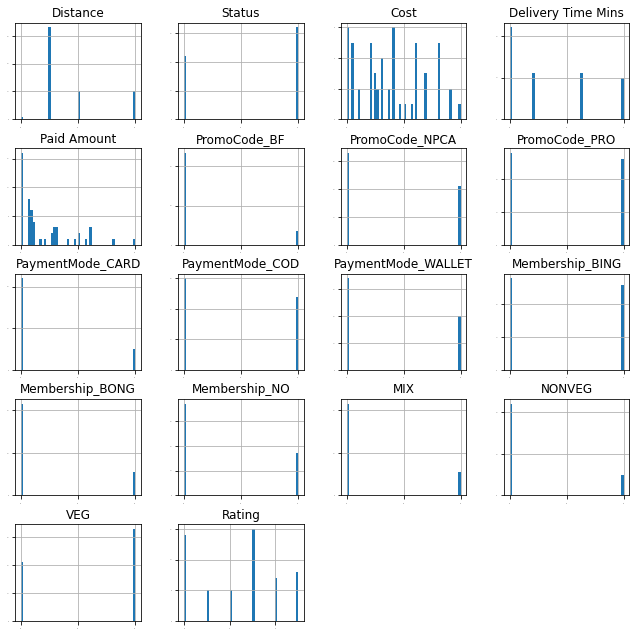

In [87]:
ax = data.hist(bins = 50, xlabelsize = -1, ylabelsize=-1, figsize=(11,11))

In [88]:
data[["Distance","Delivery Time Mins"]].corr()

,Distance,Delivery Time Mins
Distance,1.000000,-0.162039
Delivery Time Mins,-0.162039,1.000000


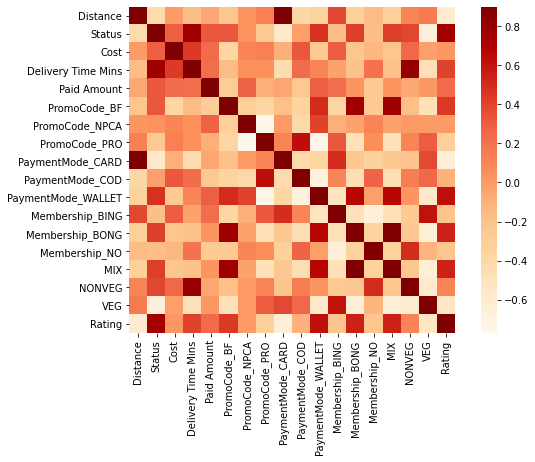

In [89]:
matrix = data.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.9, square=True, cmap="OrRd");

In [90]:
data[["Rating","Status","Delivery Time Mins","PaymentMode_WALLET","Membership_BONG","MIX"]].corr()

,Rating,Status,Delivery Time Mins,PaymentMode_WALLET,Membership_BONG,MIX
Rating,1.000000,0.749711,0.407549,0.620550,0.544542,0.544542
Status,0.749711,1.000000,0.768284,0.479841,0.419371,0.419371
Delivery Time Mins,0.407549,0.768284,1.000000,0.107181,-0.192069,-0.192069
PaymentMode_WALLET,0.620550,0.479841,0.107181,1.000000,0.659457,0.659457
Membership_BONG,0.544542,0.419371,-0.192069,0.659457,1.000000,1.000000
MIX,0.544542,0.419371,-0.192069,0.659457,1.000000,1.000000


In [91]:
cancelled_orders = data[data["Status"] == 0]

In [92]:
((cancelled_orders[cancelled_orders["PaymentMode_CARD"] == 1]).shape[0]/(cancelled_orders.shape[0]))*100

45.45454545454545

In [93]:
((cancelled_orders[cancelled_orders["PaymentMode_COD"] == 1]).shape[0]/(cancelled_orders.shape[0]))*100

45.45454545454545

In [94]:
((cancelled_orders[cancelled_orders["PaymentMode_WALLET"] == 1]).shape[0]/(cancelled_orders.shape[0]))*100

9.090909090909092

In the total cancelled orders 45% of the orders were paid using CARD, another 45% of the orders were paid by COD method only 9% of the cancelled orders were paid from WALLET

Based on this we can say that Users who are using WALLET to pay for food are less likely to cancel the order

<AxesSubplot:ylabel='Status'>

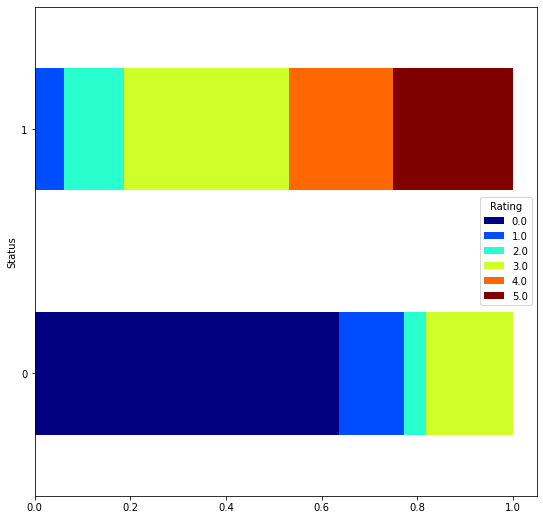

In [95]:
from matplotlib import cm
cmap = cm.get_cmap('jet')

Ratings=pd.crosstab(data['Status'],data['Rating'])
Ratings.div(Ratings.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True, figsize=(9,9))

There is no 0 Rating for Delivered orders

Cancelled orders should not have rating in the first place. So making them 0 as they were cancelled.

In [96]:
for ind in cancelled_orders.index.values:
    data["Rating"][ind] = 0

<ipython-input-96-53e83855c7c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Rating"][ind] = 0


In [97]:
data[["Distance","PaymentMode_CARD"]].corr()

,Distance,PaymentMode_CARD
Distance,1.000000,0.935011
PaymentMode_CARD,0.935011,1.000000


In [98]:
data[["Delivery Time Mins","NONVEG"]].corr()

,Delivery Time Mins,NONVEG
Delivery Time Mins,1.000000,0.796566
NONVEG,0.796566,1.000000


In [99]:
data[["PromoCode_BF","Membership_BONG"]].corr()

,PromoCode_BF,Membership_BONG
PromoCode_BF,1.000000,0.763024
Membership_BONG,0.763024,1.000000


In [100]:
data[["PromoCode_BF","MIX"]].corr()

,PromoCode_BF,MIX
PromoCode_BF,1.000000,0.763024
MIX,0.763024,1.000000


In [101]:
data[["PaymentMode_WALLET","Membership_BONG"]].corr()

,PaymentMode_WALLET,Membership_BONG
PaymentMode_WALLET,1.000000,0.659457
Membership_BONG,0.659457,1.000000


In [102]:
data.drop(["PaymentMode_CARD"],axis=1,inplace=True)

In [103]:
data.head()

,Distance,Status,Cost,Delivery Time Mins,Paid Amount,PromoCode_BF,PromoCode_NPCA,PromoCode_PRO,PaymentMode_COD,PaymentMode_WALLET,Membership_BING,Membership_BONG,Membership_NO,MIX,NONVEG,VEG,Rating
0,0.25,1,0.40,0.631579,0.60,0,0,1,1,0,1,0,0,0,0,1,2.0
1,0.25,1,0.00,0.210526,0.00,1,0,0,0,1,0,1,0,1,0,0,4.0
2,1.00,0,0.30,0.000000,0.31,0,0,1,0,0,1,0,0,0,0,1,0.0
3,0.50,1,0.90,1.000000,0.06,0,0,1,1,0,0,0,1,0,1,0,1.0
4,0.25,0,0.05,0.000000,0.00,0,0,1,1,0,0,0,1,0,0,1,0.0


<h4>Feature selection and Modeling</h4>

Let's create a model without selecting features

In [104]:
Features = ['Distance', 'Status', 'Cost', 'Delivery Time Mins', 'Paid Amount',
       'PromoCode_BF', 'PromoCode_NPCA', 'PromoCode_PRO', 'PaymentMode_COD',
       'PaymentMode_WALLET', 'Membership_BING', 'Membership_BONG',
       'Membership_NO', 'MIX', 'NONVEG', 'VEG',]

In [105]:
#Creating the Training Data
X = data.loc[:,Features]
Y = data['Rating']

In [106]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2, random_state=0)  

In [107]:
#Fitting the Linear Regression model to the training set:  

Lreg = LinearRegression()  
Lreg.fit(x_train, y_train)

LinearRegression()

In [108]:
#Predicting the Test set result;  
y_pred= Lreg.predict(x_test)  

In [109]:
#Checking the score  
print('Train Score: ', Lreg.score(x_train, y_train))  
print('Test Score: ', Lreg.score(x_test, y_test))  

Train Score:  0.8863468909743203
Test Score:  0.9296453260394313


In [110]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2=r2_score(y_test,y_pred)
print(" Mean squared error:{0}\n Mean absolute errro:{1}\n Root Mean squared error:{2}\n R2 score:{3}".format(mse,mae,rmse,r2))

 Mean squared error:0.2988620034358041
 Mean absolute errro:0.43865411961900524
 Root Mean squared error:0.5466827264838392
 R2 score:0.9296453260394313


<h4>Backward Stepwise Feaure Elimination</h4>

Let's create a model on some of the features.<br/>
We are going to use Backward Stepwise Feaure Elimination to select those features

Considering P-value i.e significance value as 0.05

In [111]:
regressor_OLS = sm.OLS(endog = y_train, exog = x_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     24.96
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           2.39e-12
Time:                        23:42:31   Log-Likelihood:                -41.236
No. Observations:                  43   AIC:                             104.5
Df Residuals:                      32   BIC:                             123.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Distance              -0.5186      0.343     -1.514      0.140      -1.216       0.179
Status                 1.9337      0.505      3.832      0.001       0.906       2.962
Cost                   0.2713      0.602      0.450      0.655      -0.955       1.498
Delivery Time Mins     1.0661      0.196      5.447      0.000       0.667       1.465
Paid Amount           -0.1190      0.932     -0.128      0.899      -2.016       1.778
PromoCode_BF           0.5641      0.583      0.967      0.341      -0.624       1.753
PromoCode_NPCA        -0.1399      0.273     -0.512      0.612      -0.696       0.416
PromoCode_PRO         -0.1296      0.378     -0.343      0.734      -0.900       0.641
PaymentMode_COD       -0.2454      0.433     -0.566      0.575      -1.128       0.637
PaymentMode_WALLET     1.2740      0.487      2.615      0.013       0.282       2.266
Membership_BING        0.3415      0.333      1.025      0.313      -0.337       1.020
Membership_BONG        0.2225      0.202      1.101      0.279      -0.189       0.634
Membership_NO         -0.2694      0.214     -1.260      0.217      -0.705       0.166
MIX                    0.2225      0.202      1.101      0.279      -0.189       0.634
NONVEG                -0.1670      0.440     -0.380      0.707      -1.063       0.729
VEG                    0.2391      0.268      0.891      0.380      -0.307       0.786
==============================================================================
Omnibus:                        0.139   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.153
Skew:                          -0.114   Prob(JB):                        0.926
Kurtosis:                       2.817   Cond. No.                     1.37e+31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.59e-61. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We got highest P value as 0.899 for Paid Amount. Dropping the Paid Amount and build the model


In [112]:
x_train.drop('Paid Amount', axis = 1, inplace = True) 

C:\Users\darkseid\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [113]:
regressor_OLS = sm.OLS(endog = y_train, exog = x_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     28.58
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           4.33e-13
Time:                        23:42:31   Log-Likelihood:                -41.247
No. Observations:                  43   AIC:                             102.5
Df Residuals:                      33   BIC:                             120.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Distance              -0.5111      0.332     -1.537      0.134      -1.188       0.165
Status                 1.9034      0.439      4.338      0.000       1.011       2.796
Cost                   0.2707      0.593      0.456      0.651      -0.936       1.478
Delivery Time Mins     1.0578      0.182      5.815      0.000       0.688       1.428
PromoCode_BF           0.6186      0.392      1.579      0.124      -0.179       1.416
PromoCode_NPCA        -0.1510      0.255     -0.592      0.558      -0.670       0.368
PromoCode_PRO         -0.1634      0.267     -0.613      0.544      -0.706       0.379
PaymentMode_COD       -0.2203      0.381     -0.579      0.567      -0.995       0.554
PaymentMode_WALLET     1.2595      0.467      2.699      0.011       0.310       2.209
Membership_BING        0.3478      0.324      1.072      0.292      -0.312       1.008
Membership_BONG        0.2167      0.194      1.117      0.272      -0.178       0.612
Membership_NO         -0.2603      0.199     -1.310      0.199      -0.664       0.144
MIX                    0.2167      0.194      1.117      0.272      -0.178       0.612
NONVEG                -0.1440      0.395     -0.364      0.718      -0.948       0.660
VEG                    0.2316      0.258      0.898      0.376      -0.293       0.756
==============================================================================
Omnibus:                        0.111   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.946   Jarque-Bera (JB):                0.122
Skew:                          -0.097   Prob(JB):                        0.941
Kurtosis:                       2.826   Cond. No.                     6.22e+31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.67e-62. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Next highest P value is NonVeg 0.718

In [114]:
#Iteration 2
x_train.drop('NONVEG', axis = 1, inplace = True) 

C:\Users\darkseid\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [115]:
regressor_OLS = sm.OLS(endog = y_train, exog = x_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     28.58
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           4.33e-13
Time:                        23:42:31   Log-Likelihood:                -41.247
No. Observations:                  43   AIC:                             102.5
Df Residuals:                      33   BIC:                             120.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Distance              -0.5613      0.317     -1.770      0.086      -1.206       0.084
Status                 1.9396      0.529      3.665      0.001       0.863       3.016
Cost                   0.2707      0.593      0.456      0.651      -0.936       1.478
Delivery Time Mins     1.0005      0.152      6.601      0.000       0.692       1.309
PromoCode_BF           0.5990      0.414      1.448      0.157      -0.243       1.441
PromoCode_NPCA        -0.1705      0.275     -0.620      0.540      -0.730       0.389
PromoCode_PRO         -0.1829      0.271     -0.674      0.505      -0.735       0.369
PaymentMode_COD       -0.2579      0.461     -0.559      0.580      -1.197       0.681
PaymentMode_WALLET     1.2219      0.533      2.294      0.028       0.138       2.306
Membership_BING        0.3071      0.426      0.722      0.476      -0.559       1.173
Membership_BONG        0.2395      0.196      1.219      0.231      -0.160       0.639
Membership_NO         -0.3010      0.171     -1.759      0.088      -0.649       0.047
MIX                    0.2395      0.196      1.219      0.231      -0.160       0.639
VEG                    0.3419      0.536      0.638      0.528      -0.749       1.433
==============================================================================
Omnibus:                        0.111   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.946   Jarque-Bera (JB):                0.122
Skew:                          -0.097   Prob(JB):                        0.941
Kurtosis:                       2.826   Cond. No.                     8.62e+31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.35e-62. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [116]:
#Iteration 3 
#Removing the Cost with 0.651 P value
x_train.drop('Cost', axis = 1, inplace = True) 


C:\Users\darkseid\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [117]:
regressor_OLS = sm.OLS(endog = y_train, exog = x_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     32.89
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           8.00e-14
Time:                        23:42:31   Log-Likelihood:                -41.382
No. Observations:                  43   AIC:                             100.8
Df Residuals:                      34   BIC:                             116.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Distance              -0.5025      0.286     -1.755      0.088      -1.084       0.079
Status                 1.9908      0.511      3.895      0.000       0.952       3.029
Delivery Time Mins     1.0181      0.145      7.031      0.000       0.724       1.312
PromoCode_BF           0.5575      0.399      1.398      0.171      -0.253       1.368
PromoCode_NPCA        -0.1092      0.237     -0.460      0.648      -0.591       0.373
PromoCode_PRO         -0.1648      0.265     -0.621      0.538      -0.704       0.374
PaymentMode_COD       -0.2013      0.439     -0.458      0.650      -1.094       0.691
PaymentMode_WALLET     1.1391      0.495      2.301      0.028       0.133       2.145
Membership_BING        0.3068      0.421      0.730      0.471      -0.548       1.161
Membership_BONG        0.2786      0.175      1.595      0.120      -0.076       0.634
Membership_NO         -0.3019      0.169     -1.785      0.083      -0.646       0.042
MIX                    0.2786      0.175      1.595      0.120      -0.076       0.634
VEG                    0.3358      0.530      0.634      0.530      -0.741       1.412
==============================================================================
Omnibus:                        0.044   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.978   Jarque-Bera (JB):                0.204
Skew:                          -0.059   Prob(JB):                        0.903
Kurtosis:                       2.684   Cond. No.                     1.43e+31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.6e-61. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [118]:
#Iteration 4 
#Removing the PaymentMode_COD with 0.650 P value
x_train.drop('PaymentMode_COD', axis = 1, inplace = True) 

C:\Users\darkseid\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [119]:
regressor_OLS = sm.OLS(endog = y_train, exog = x_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     32.89
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           8.00e-14
Time:                        23:42:31   Log-Likelihood:                -41.382
No. Observations:                  43   AIC:                             100.8
Df Residuals:                      34   BIC:                             116.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Distance              -0.2341      0.671     -0.349      0.729      -1.598       1.130
Status                 2.0382      0.602      3.383      0.002       0.814       3.263
Delivery Time Mins     0.9431      0.226      4.182      0.000       0.485       1.401
PromoCode_BF           0.4183      0.599      0.699      0.489      -0.798       1.635
PromoCode_NPCA        -0.2484      0.484     -0.513      0.611      -1.233       0.736
PromoCode_PRO         -0.3041      0.413     -0.736      0.467      -1.144       0.536
PaymentMode_WALLET     1.3404      0.427      3.139      0.003       0.473       2.208
Membership_BING        0.1382      0.750      0.184      0.855      -1.387       1.663
Membership_BONG        0.1982      0.246      0.806      0.426      -0.302       0.698
Membership_NO         -0.4705      0.399     -1.181      0.246      -1.280       0.339
MIX                    0.1982      0.246      0.806      0.426      -0.302       0.698
VEG                    0.3752      0.604      0.621      0.539      -0.852       1.603
==============================================================================
Omnibus:                        0.044   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.978   Jarque-Bera (JB):                0.204
Skew:                          -0.059   Prob(JB):                        0.903
Kurtosis:                       2.684   Cond. No.                     1.08e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.31e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [120]:
#Iteration 5
#Removing the Membership_BING with 0.855 P value
x_train.drop('Membership_BING', axis = 1, inplace = True) 

C:\Users\darkseid\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [121]:
regressor_OLS = sm.OLS(endog = y_train, exog = x_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     32.89
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           8.00e-14
Time:                        23:42:31   Log-Likelihood:                -41.382
No. Observations:                  43   AIC:                             100.8
Df Residuals:                      34   BIC:                             116.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Distance              -0.2341      0.671     -0.349      0.729      -1.598       1.130
Status                 1.9801      0.907      2.183      0.036       0.137       3.823
Delivery Time Mins     1.0351      0.697      1.484      0.147      -0.382       2.452
PromoCode_BF           0.5226      1.107      0.472      0.640      -1.726       2.771
PromoCode_NPCA        -0.1441      1.011     -0.142      0.888      -2.200       1.911
PromoCode_PRO         -0.1998      0.920     -0.217      0.829      -2.070       1.670
PaymentMode_WALLET     1.3404      0.427      3.139      0.003       0.473       2.208
Membership_BONG        0.1654      0.214      0.772      0.445      -0.270       0.601
Membership_NO         -0.6087      0.480     -1.269      0.213      -1.583       0.366
MIX                    0.1654      0.214      0.772      0.445      -0.270       0.601
VEG                    0.4091      0.441      0.927      0.360      -0.487       1.306
==============================================================================
Omnibus:                        0.044   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.978   Jarque-Bera (JB):                0.204
Skew:                          -0.059   Prob(JB):                        0.903
Kurtosis:                       2.684   Cond. No.                     1.95e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.05e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [122]:
#Iteration 6 
#Removing the PromoCode_NPCA with 0.888 P value
x_train.drop('PromoCode_NPCA', axis = 1, inplace = True) 

C:\Users\darkseid\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [123]:
regressor_OLS = sm.OLS(endog = y_train, exog = x_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     32.89
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           8.00e-14
Time:                        23:42:31   Log-Likelihood:                -41.382
No. Observations:                  43   AIC:                             100.8
Df Residuals:                      34   BIC:                             116.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Distance              -0.2341      0.671     -0.349      0.729      -1.598       1.130
Status                 2.2271      2.615      0.852      0.400      -3.086       7.541
Delivery Time Mins     0.6439      3.410      0.189      0.851      -6.285       7.573
PromoCode_BF           0.6667      0.504      1.323      0.195      -0.357       1.690
PromoCode_PRO         -0.0557      0.320     -0.174      0.863      -0.707       0.596
PaymentMode_WALLET     1.3404      0.427      3.139      0.003       0.473       2.208
Membership_BONG        0.0111      1.098      0.010      0.992      -2.220       2.242
Membership_NO         -0.6087      0.480     -1.269      0.213      -1.583       0.366
MIX                    0.0111      1.098      0.010      0.992      -2.220       2.242
VEG                    0.2650      0.667      0.397      0.694      -1.091       1.621
==============================================================================
Omnibus:                        0.044   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.978   Jarque-Bera (JB):                0.204
Skew:                          -0.059   Prob(JB):                        0.903
Kurtosis:                       2.684   Cond. No.                     4.76e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.13e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [124]:
#Iteration 7
#Removing the Status with 0.992 P value
x_train.drop(['Membership_BONG','MIX'], axis = 1, inplace = True)

C:\Users\darkseid\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [125]:
regressor_OLS = sm.OLS(endog = y_train, exog = x_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              74.48
Date:                Sat, 01 Jan 2022   Prob (F-statistic):                    1.10e-19
Time:                        23:42:31   Log-Likelihood:                         -41.383
No. Observations:                  43   AIC:                                      98.77
Df Residuals:                      35   BIC:                                      112.9
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Distance              -0.2284      0.359     -0.636      0.529      -0.958       0.501
Status                 2.2526      0.666      3.380      0.002       0.900       3.605
Delivery Time Mins     0.6107      0.849      0.720      0.477      -1.112       2.334
PromoCode_BF           0.6674      0.491      1.360      0.182      -0.329       1.664
PromoCode_PRO         -0.0542      0.283     -0.192      0.849      -0.629       0.521
PaymentMode_WALLET     1.3419      0.395      3.395      0.002       0.539       2.144
Membership_NO         -0.6051      0.314     -1.926      0.062      -1.243       0.033
VEG                    0.2588      0.257      1.005      0.322      -0.264       0.781
==============================================================================
Omnibus:                        0.046   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.977   Jarque-Bera (JB):                0.207
Skew:                          -0.061   Prob(JB):                        0.902
Kurtosis:                       2.683   Cond. No.                         13.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
#Iteration 8
#Removing the PromoCode_PRO with 0.849 P value
x_train.drop('PromoCode_PRO', axis = 1, inplace = True)

C:\Users\darkseid\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [127]:
regressor_OLS = sm.OLS(endog = y_train, exog = x_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              87.45
Date:                Sat, 01 Jan 2022   Prob (F-statistic):                    1.15e-20
Time:                        23:42:31   Log-Likelihood:                         -41.405
No. Observations:                  43   AIC:                                      96.81
Df Residuals:                      36   BIC:                                      109.1
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Distance              -0.2471      0.341     -0.724      0.474      -0.939       0.445
Status                 2.2228      0.639      3.477      0.001       0.926       3.519
Delivery Time Mins     0.6190      0.836      0.740      0.464      -1.077       2.315
PromoCode_BF           0.6603      0.483      1.368      0.180      -0.319       1.639
PaymentMode_WALLET     1.3817      0.332      4.168      0.000       0.709       2.054
Membership_NO         -0.6211      0.299     -2.079      0.045      -1.227      -0.015
VEG                    0.2447      0.243      1.005      0.321      -0.249       0.738
==============================================================================
Omnibus:                        0.043   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.979   Jarque-Bera (JB):                0.202
Skew:                          -0.060   Prob(JB):                        0.904
Kurtosis:                       2.687   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
x_test.columns

Index(['Distance', 'Status', 'Cost', 'Delivery Time Mins', 'Paid Amount',
       'PromoCode_BF', 'PromoCode_NPCA', 'PromoCode_PRO', 'PaymentMode_COD',
       'PaymentMode_WALLET', 'Membership_BING', 'Membership_BONG',
       'Membership_NO', 'MIX', 'NONVEG', 'VEG'],
      dtype='object')

In [129]:
x_test.drop(['Cost','Paid Amount','PromoCode_NPCA', 'PromoCode_PRO', 'PaymentMode_COD','Membership_BING', 'Membership_BONG','MIX', 'NONVEG'], axis = 1, inplace = True) 

C:\Users\darkseid\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [130]:
regressor_OLS = sm.OLS(endog = y_test, exog = x_test).fit()
regressor_OLS.summary()

C:\Users\darkseid\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              127.5
Date:                Sat, 01 Jan 2022   Prob (F-statistic):                    0.000156
Time:                        23:42:31   Log-Likelihood:                          1.1085
No. Observations:                  11   AIC:                                      11.78
Df Residuals:                       4   BIC:                                      14.57
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Distance               0.1438      0.401      0.359      0.738      -0.969       1.256
Status                 3.5608      0.644      5.531      0.005       1.773       5.348
Delivery Time Mins    -0.6932      0.801     -0.865      0.436      -2.918       1.532
PromoCode_BF           0.0530      0.499      0.106      0.921      -1.333       1.439
PaymentMode_WALLET     1.4962      0.363      4.125      0.015       0.489       2.503
Membership_NO          0.0927      0.325      0.286      0.789      -0.809       0.994
VEG                   -0.1286      0.222     -0.579      0.594      -0.746       0.488
==============================================================================
Omnibus:                        6.429   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                2.525
Skew:                          -0.467   Prob(JB):                        0.283
Kurtosis:                       5.153   Cond. No.                         11.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Observations</b>

Without using feature selection algorithm we got R-squared as 0.92. After using Feature selection algorithm we got R-Squared  as 0.996 which is more accurate than original model